In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from MAPE_error import mean_absolute_percentage_error

In [3]:
df_houseprice = pd.read_csv(r"C:\Users\Wiktoria\Desktop\Python Basics\Projekt\Regresja liniowa\jupiter_project_files\Price by sqft\test_price_sqft.test.csv")

In [4]:
df_houseprice.head()

,_id,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,dist_to_bellevue_km,dist_to_northwest_seattle_km,price_by_sqft_log,age_of_house,cond_scale
0,66d6058ebb8048bdee45e30c,1.00,1180,5650,1.0,0,0,3,7,0,1340,5650,11.638796,21.391434,5.236712,69,21
1,66d6058ebb8048bdee45e30d,2.25,2570,7242,2.0,0,0,3,7,400,1690,7639,17.132608,11.751068,5.343953,73,21
2,66d6058ebb8048bdee45e30e,1.00,770,10000,1.0,0,0,3,6,0,2720,8062,11.960641,19.452882,5.454322,91,18
3,66d6058ebb8048bdee45e30f,3.00,1960,5000,1.0,0,0,5,7,910,1360,5000,21.099529,10.493629,5.730630,59,35
4,66d6058ebb8048bdee45e310,2.00,1680,8080,1.0,0,0,3,8,0,1800,7503,12.132790,29.355215,5.715617,37,24


In [5]:
df_houseprice.isna().any()

_id                             False
bathrooms                       False
sqft_living                     False
sqft_lot                        False
floors                          False
waterfront                      False
view                            False
condition                       False
grade                           False
sqft_basement                   False
sqft_living15                   False
sqft_lot15                      False
dist_to_bellevue_km             False
dist_to_northwest_seattle_km    False
price_by_sqft_log               False
age_of_house                    False
cond_scale                      False
dtype: bool

In [6]:
df_houseprice.isnull().any()

_id                             False
bathrooms                       False
sqft_living                     False
sqft_lot                        False
floors                          False
waterfront                      False
view                            False
condition                       False
grade                           False
sqft_basement                   False
sqft_living15                   False
sqft_lot15                      False
dist_to_bellevue_km             False
dist_to_northwest_seattle_km    False
price_by_sqft_log               False
age_of_house                    False
cond_scale                      False
dtype: bool

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df_houseprice.drop(columns=['price_by_sqft_log']),
    df_houseprice['price_by_sqft_log'],
    random_state=123,
    test_size=0.3)

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = X_train.drop(columns=['_id'])
X_test = X_test.drop(columns=['_id'])

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#linear regression model
model = LinearRegression()

In [12]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
pred = model.predict(X_test_scaled)

In [14]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))}')

MSE error for test data: 5686.74726973337
RMSE error for test data: 75.41052492678571
R2-score: 0.5227336984623719
MAPE error for test data: 22.119426985163525


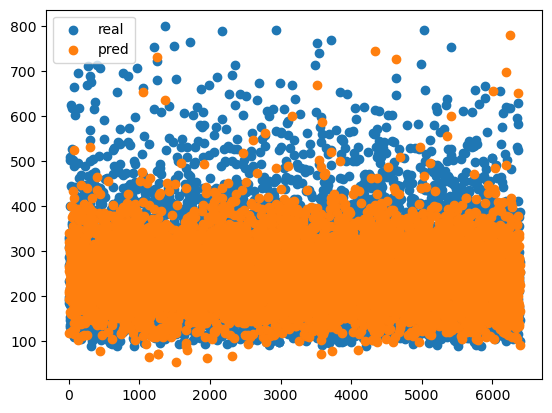

In [15]:
plt.figure()
plt.scatter(list(range(len(y_test))), np.exp(y_test))
plt.scatter(list(range(len(pred))), np.exp(pred))
plt.legend(['real', 'pred'])

In [16]:
#decision tree model
tree_reg = DecisionTreeRegressor(max_depth=7)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=7)

In [17]:
pred_tree = tree_reg.predict(X_test_scaled)

In [18]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_tree))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_tree), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_tree))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_tree))}')

MSE error for test data: 4497.525994330158
RMSE error for test data: 67.06359664027987
R2-score: 0.622540356451617
MAPE error for test data: 19.356432350728277


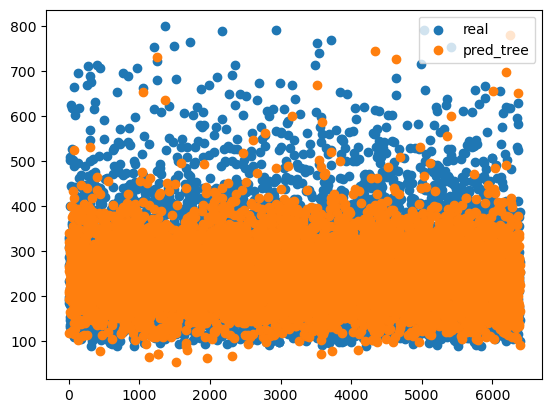

In [19]:
plt.figure()
plt.scatter(list(range(len(y_test))), np.exp(y_test))
plt.scatter(list(range(len(pred))), np.exp(pred))
plt.legend(['real', 'pred_tree'])

0.0007402096872228014 bathrooms
0.09908456567227457 sqft_living
0.00630579628731526 sqft_lot
0.0016596531616532354 floors
0.026227277619574912 waterfront
0.005932897576688327 view
0.0 condition
0.014506234723214058 grade
0.015237822362156064 sqft_basement
0.008342939907614713 sqft_living15
0.025849584343321432 sqft_lot15
0.25106996024193023 dist_to_bellevue_km
0.5319744300306793 dist_to_northwest_seattle_km
0.009381081628027206 age_of_house
0.0036875467583278006 cond_scale


<BarContainer object of 15 artists>

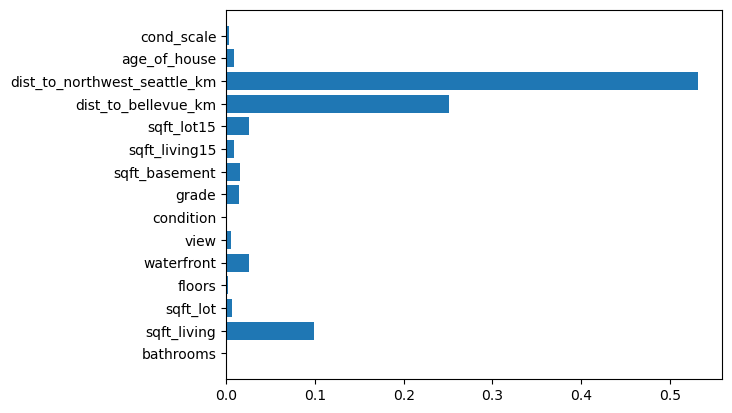

In [20]:
# importance of features
for i,j in zip(tree_reg.feature_importances_, X_train.columns):
    print(i, j)
    
plt.figure()
plt.barh(X_train.columns, tree_reg.feature_importances_)

In [21]:
#random forest model
rnd_forest = RandomForestRegressor(n_estimators=200,
                                   max_depth=5,
                                   random_state=123)

In [22]:
rnd_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=123)

In [23]:
pred_forest = rnd_forest.predict(X_test_scaled)

In [24]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_forest))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_forest), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_forest))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_forest))}')

MSE error for test data: 4917.971713909776
RMSE error for test data: 70.12825189543638
R2-score: 0.5872540031000113
MAPE error for test data: 19.933811408804257


In [25]:
# importance of features
for i,j in zip(rnd_forest.feature_importances_, X_train.columns):
    print(i, j)

1.9241334058673143e-05 bathrooms
0.09021541969599411 sqft_living
0.006089202491697837 sqft_lot
8.887279843961598e-05 floors
0.016437570279871968 waterfront
0.009949564043639407 view
5.667013356519016e-06 condition
0.014548775873059422 grade
0.004979181533822896 sqft_basement
0.004078204929102922 sqft_living15
0.01724175539490315 sqft_lot15
0.24770693049093948 dist_to_bellevue_km
0.5827938393675486 dist_to_northwest_seattle_km
0.005419212775846328 age_of_house
0.00042656197771907123 cond_scale


In [26]:
#GridSearchCV
params = {
    'n_estimators': [5, 10, 25, 40, 50, 55, 60],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
    'random_state': [123]
    }

rnd_forest_ = RandomForestRegressor()

In [27]:
gs = GridSearchCV(rnd_forest_, params, scoring='r2', verbose=2, cv=2)

In [28]:
gs.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 56 candidates, totalling 112 fits
[CV] END ...max_depth=None, n_estimators=5, random_state=123; total time=   0.5s
[CV] END ...max_depth=None, n_estimators=5, random_state=123; total time=   0.5s
[CV] END ..max_depth=None, n_estimators=10, random_state=123; total time=   1.0s
[CV] END ..max_depth=None, n_estimators=10, random_state=123; total time=   1.0s
[CV] END ..max_depth=None, n_estimators=25, random_state=123; total time=   2.7s
[CV] END ..max_depth=None, n_estimators=25, random_state=123; total time=   2.7s
[CV] END ..max_depth=None, n_estimators=40, random_state=123; total time=   4.4s
[CV] END ..max_depth=None, n_estimators=40, random_state=123; total time=   4.3s
[CV] END ..max_depth=None, n_estimators=50, random_state=123; total time=   5.6s
[CV] END ..max_depth=None, n_estimators=50, random_state=123; total time=   5.5s
[CV] END ..max_depth=None, n_estimators=55, random_state=123; total time=   6.0s
[CV] END ..max_depth=None, n_estimators=55, ran

[CV] END .....max_depth=7, n_estimators=10, random_state=123; total time=   0.3s
[CV] END .....max_depth=7, n_estimators=25, random_state=123; total time=   0.9s
[CV] END .....max_depth=7, n_estimators=25, random_state=123; total time=   0.9s
[CV] END .....max_depth=7, n_estimators=40, random_state=123; total time=   1.5s
[CV] END .....max_depth=7, n_estimators=40, random_state=123; total time=   1.5s
[CV] END .....max_depth=7, n_estimators=50, random_state=123; total time=   1.9s
[CV] END .....max_depth=7, n_estimators=50, random_state=123; total time=   1.8s
[CV] END .....max_depth=7, n_estimators=55, random_state=123; total time=   2.0s
[CV] END .....max_depth=7, n_estimators=55, random_state=123; total time=   2.0s
[CV] END .....max_depth=7, n_estimators=60, random_state=123; total time=   2.2s
[CV] END .....max_depth=7, n_estimators=60, random_state=123; total time=   2.2s


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [5, 10, 25, 40, 50, 55, 60],
                         'random_state': [123]},
             scoring='r2', verbose=2)

In [29]:
pred_best = gs.best_estimator_.predict(X_test_scaled)

In [30]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_best))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_best), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_best))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_best))}')

MSE error for test data: 2895.614480793512
RMSE error for test data: 53.81091414196113
R2-score: 0.7569824807790492
MAPE error for test data: 14.384393546666352
